<a href="https://colab.research.google.com/github/leabea/HUK_CodingChallenge/blob/main/CodingChallange_HUK_LeaKarimi_05082024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorative Datenanalyse:


Hier ist zu untersuchen, was bei den beiden Datensätzen "freMTPL2freq" und "freMTPL2sev" auffällt und, welche statistischen Zusammenhänge erkennbar sind, die für die anschließende Modellierung wichtig sein könnten.



In [39]:
#Installation von liac-arff. Bei liac-arff handelt es sich um eine Python-Bibliothek, die genutzt wird, um Arff Files zu lesen.
%pip install liac-arff


In [40]:
#Installation der Sklearn-Bibliothek scikit-learn, einer Bibliothek für maschinelles Lernen.
%pip install scikit-learn

In [41]:
#Import aller benötigen Bibliotheken
import arff
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [42]:
#Laden der zuvor Datensätze aus Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
file_freq = '/content/drive/My Drive/HUK/freMTPL2freq.arff'

#Auslesen der Arff-Datei
with open(file_freq, 'r') as file:
    data = arff.load(file)

#Extrahieren der Spalten-Namen und der der Daten in den Zellen
file_columns_freq = [attr[0] for attr in data['attributes']]
file_data= data['data']

#Speicherung der Daten in einem Pandas-Dataframe
df_freq = pd.DataFrame(file_data, columns=file_columns_freq)


In [44]:
file_sev = '/content/drive/My Drive/HUK/freMTPL2sev.arff'

#Auslesen der Arff-Datei
with open(file_sev, 'r') as file:
    data = arff.load(file)

#Extrahieren der Daten und Attribute
file_columns_sev = [attr[0] for attr in data['attributes']]
file_data_sev= data['data']

#Speicherung der Daten in einem Pandas-Dataframe
df_sev = pd.DataFrame(file_data_sev, columns=file_columns_sev)


In [45]:
#Ausgabe des Datensatzes 'df_freq'
df_freq

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.00,1.00,0.10,D,5.00,0.00,55.00,50.00,B12,Regular,1217.00,R82
1,3.00,1.00,0.77,D,5.00,0.00,55.00,50.00,B12,Regular,1217.00,R82
2,5.00,1.00,0.75,B,6.00,2.00,52.00,50.00,B12,Diesel,54.00,R22
3,10.00,1.00,0.09,B,7.00,0.00,46.00,50.00,B12,Diesel,76.00,R72
4,11.00,1.00,0.84,B,7.00,0.00,46.00,50.00,B12,Diesel,76.00,R72
...,...,...,...,...,...,...,...,...,...,...,...,...
678008,6114326.00,0.00,0.00,E,4.00,0.00,54.00,50.00,B12,Regular,3317.00,R93
678009,6114327.00,0.00,0.00,E,4.00,0.00,41.00,95.00,B12,Regular,9850.00,R11
678010,6114328.00,0.00,0.00,D,6.00,2.00,45.00,50.00,B12,Diesel,1323.00,R82
678011,6114329.00,0.00,0.00,B,4.00,0.00,60.00,50.00,B12,Regular,95.00,R26


In [46]:
#Ausgabe des Datensatzes 'df_sev'
df_sev

,IDpol,ClaimAmount
0,1552.00,995.20
1,1010996.00,1128.12
2,4024277.00,1851.11
3,4007252.00,1204.00
4,4046424.00,1204.00
...,...,...
26634,3254353.00,1200.00
26635,3254353.00,1800.00
26636,3254353.00,1000.00
26637,2222064.00,767.55


In [47]:
#Vereinheitlichung des Formats --> alle Floats sollen nur noch 2 Nachkommastellen haben
pd.options.display.float_format = '{:.2f}'.format

In [48]:
#Anzeige einer statistischen Zusammenfassung von 'df_freq'
df_freq.describe()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,678013.00,678013.00,678013.00,678013.00,678013.00,678013.00,678013.00,678013.00
mean,2621856.92,0.05,0.53,6.45,7.04,45.50,59.76,1792.42
std,1641782.75,0.24,0.36,2.05,5.67,14.14,15.64,3958.65
min,1.00,0.00,0.00,4.00,0.00,18.00,50.00,1.00
25%,1157951.00,0.00,0.18,5.00,2.00,34.00,50.00,92.00
50%,2272152.00,0.00,0.49,6.00,6.00,44.00,50.00,393.00
75%,4046274.00,0.00,0.99,7.00,11.00,55.00,64.00,1658.00
max,6114330.00,16.00,2.01,15.00,100.00,100.00,230.00,27000.00


In [49]:
#Anzeige einer statistischen Zusammenfassung von 'df_sev'
df_sev.describe()

,IDpol,ClaimAmount
count,26639.00,26639.00
mean,2279863.83,2278.54
std,1577201.81,29297.48
min,139.00,1.00
25%,1087642.50,686.81
50%,2137413.00,1172.00
75%,3180162.00,1228.08
max,6113971.00,4075400.56


In [50]:
#Duplikate von IDpol in df_freq prüfen
len(df_freq['IDpol'].unique())

678013

In [51]:
#Duplikate von IDpol in df_sev prüfen
len(df_sev['IDpol'].unique())

24950

Bei df_sev 24950 eindeutige IDs, aber 26639 Reihen, d.h.: einige IDs sind mehrfach gelistet, da es für manche Verträge mehrmals zum Schaden kam.

Erkenntnisse:

df_freq:


*   678013 Reihen und 12 Spalten
*   Eindeutige Ids ohne Duplikate --> Auflistung aller Verträge
*   Bei etwa 5 % aller Verträge im Datensatz kommt es zur Schadensregistrierung

df_sev:


*   Deutlich kleinerer Datensatz als df_freq: 26639 Reihen und 2 Spalten
*   Listet alle Vertrags-Ids auf, zu denen mindestens ein Schaden registriert wurde.

*   Wurde ein Schaden registriert, beträgt die durchschnittliche Schadenshöhe 2278 (Euro), jedoch mit einer hohen Standardabweichung, das heißt die Schadenshöhe variiert sehr stark. Sie liegt jedoch minimal bei 1 (Euro)



In [52]:
#Anzeige einer strukturellen Zusammenfassung von 'df_freq'
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDpol       678013 non-null  float64
 1   ClaimNb     678013 non-null  float64
 2   Exposure    678013 non-null  float64
 3   Area        678013 non-null  object 
 4   VehPower    678013 non-null  float64
 5   VehAge      678013 non-null  float64
 6   DrivAge     678013 non-null  float64
 7   BonusMalus  678013 non-null  float64
 8   VehBrand    678013 non-null  object 
 9   VehGas      678013 non-null  object 
 10  Density     678013 non-null  float64
 11  Region      678013 non-null  object 
dtypes: float64(8), object(4)
memory usage: 62.1+ MB


In [53]:
#Anzeige einer strukturellen Zusammenfassung von 'df_sev'
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26639 entries, 0 to 26638
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IDpol        26639 non-null  float64
 1   ClaimAmount  26639 non-null  float64
dtypes: float64(2)
memory usage: 416.4 KB


Erkenntnisse:

df_freq:


*   8 Spalten vom Typ 'float' und 4 vom Typ 'Object' --> Die Object-Columns müssen in numerische (float) Spalten transformiert werden, damit man die Informationen in die Modelle einfließen lassen kann.
*   Keine Null-Werte

df_sev:


*   2 Spalten vom Typ 'float'
*   Keine Null Werte

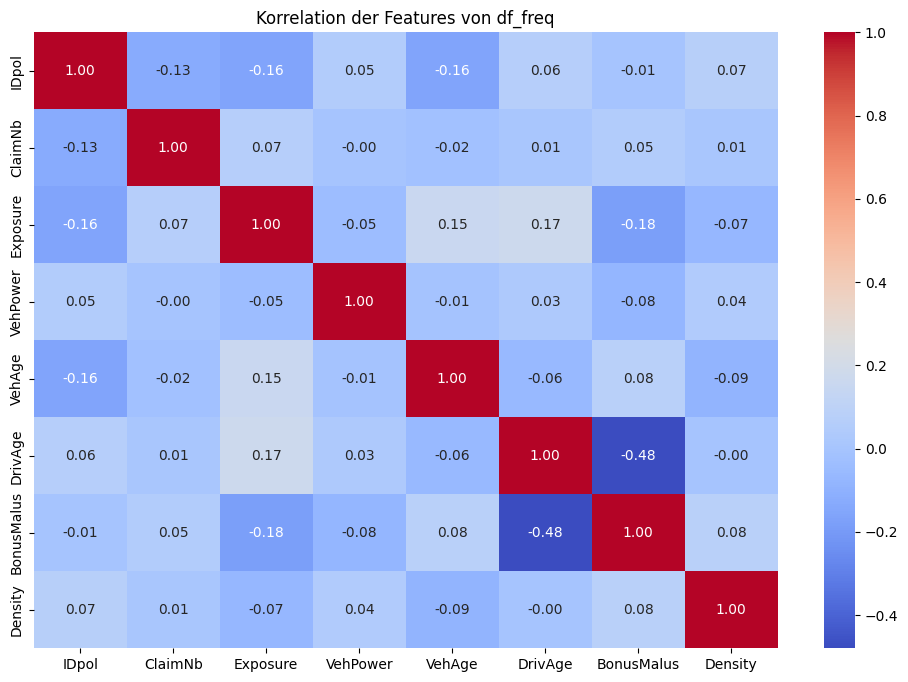

In [54]:
#Erstellung einer Korrelationsmatrix, um Korrelationen zwischen Features zu erkennen
#Hierzu können nur numerische Werte eingelesen werden
float_cols = df_freq.select_dtypes(include=['float64']).columns

#Korrelationen nur für float-Spalten untersuchen
corr_matrix = df_freq[float_cols].corr()

#Erstellen einer Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korrelation der Features von df_freq')
plt.show()

Erkenntnisse:


*   Das Fahreralter korreliert negativ mit dem Bonusmalus, d.h. je älter der Fahrer, desto niedriger der  Schadensfreiheitsrabatt.
*   Die Länge des Versicherungszeitraums korreliert negativ mit dem Bonusmalus.
*   Das Fahreralter und das Fahrzeugalter korrelieren positiv mit der Länge des Versicherungszeitraums.
*   Korrelationsmatrix bei df_sev überflüssig, da zur ID-Spalte nur eine weitere Spalte existiert



# Feature Engineering

Aufbereitung der Daten, sodass sich diese für die Modellierung eignen.



In [55]:
#Mergen der beiden Datensätze zu einem Datensatz anhang der IDpol
df_combined = pd.merge(df_freq, df_sev, on='IDpol', how='left')

In [56]:
#Transformation der nominalen Spalten (object type) in numerische Spalten mithilfe des LabelEncoders
columns_to_encode = ['Area', 'VehBrand', 'VehGas', 'Region']
labelEncoder = LabelEncoder()


for col in columns_to_encode:
    df_combined[col] = labelEncoder.fit_transform(df_combined[col].astype(str))

In [57]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679513 entries, 0 to 679512
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        679513 non-null  float64
 1   ClaimNb      679513 non-null  float64
 2   Exposure     679513 non-null  float64
 3   Area         679513 non-null  int64  
 4   VehPower     679513 non-null  float64
 5   VehAge       679513 non-null  float64
 6   DrivAge      679513 non-null  float64
 7   BonusMalus   679513 non-null  float64
 8   VehBrand     679513 non-null  int64  
 9   VehGas       679513 non-null  int64  
 10  Density      679513 non-null  float64
 11  Region       679513 non-null  int64  
 12  ClaimAmount  26444 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 67.4 MB


In [58]:
#Transformation aller int-Spalten in float-Spalten, um einheitliche Datentypen zu haben
int_columns = df_combined.select_dtypes(include=['int64']).columns
df_combined[int_columns] = df_combined[int_columns].astype('float64')

In [59]:
#Aufsummieren aller Schadenshöhen für die gleiche IDpol und Vernachlässigung überflüssiger Reihen
df_refined = df_combined.groupby('IDpol').agg({
    'ClaimNb': 'first',
    'Exposure': 'first',
    'ClaimAmount': 'sum',
    'Area': 'first',
    'VehPower': 'first',
    'VehAge': 'first',
    'DrivAge': 'first',
    'BonusMalus': 'first',
    'VehBrand': 'first',
    'VehGas': 'first',
    'Density': 'first',
    'Region': 'first'
}).reset_index()

In [60]:
#Hinzufügen der Zielvariablen (Target ist die Schadenshöhe geteilt druch den Versicherungszeitraum --> Schaden pro Jahr pro Kunde)
df_refined['Target'] = df_refined['ClaimAmount'] / df_refined['Exposure']

In [61]:
#Vereinheitlichung des Formats --> alle Floats sollen nur noch 2 Nachkommastellen haben
pd.options.display.float_format = '{:.2f}'.format

In [62]:
#Vorbereitung des Datensatzes für die Modellierung

#Löschen der Spalte 'Idpol', welche lediglich eine ID darstellt und damit keine Auswirkung auf den Versicherungsbeitrag hat.
#Des Weiteren wird die Zielvariable 'Target' entfernt und ihre Komponenten 'ClaimAmount' und 'Exposure' auch, um die Modellierung nicht zu verfälschen.
X = df_refined.drop(columns=['IDpol', 'ClaimAmount', 'Target', 'Exposure'])
#Speicherung der Einträge der Spalte 'Target' (Zielvariable) in eine Liste
y = df_refined['Target']

# Modellvergleich:





### 1. Verschiedene Modelle zur Ermittlung der Zielvariablen
**Lineare Regression**


  *   Kurze Beschreibung: Die lineare Regression ist statistisches Verfahren, bei dem man versucht, eine abhängige Variable durch eine oder mehrere unabhängige Variablen zu erklären.
  *   Anwendungsfälle:
      *   bei linearen Zusammenhängen zwischen Feature- und Targetvariablen
      *   bei numerischen Daten

**Random Forest**

  *   Kurze Beschreibung: Random Forest ist ein Ensemble-Lernverfahren, das aus vielen Entscheidungsbäumen besteht und die Vorhersagen dieser Bäume kombiniert, um genauere Ergebnisse zu erzielen. Jeder Baum wird mit einer zufälligen Stichprobe der Daten trainiert, wodurch das Modell weniger anfällig für Überanpassung (Overfitting) wird und besser mit unterschiedlichen Daten umgehen kann.
  *   Anwendungsfälle:
      *   große Datensätze
      *   funktioniert bei regressiven Fragestellungen --> mit numerischen Daten

**Gradient Boosting**

  *   Kurze Beschreibung: Gradient Boosting ist ein iterativer Ansatz, bei dem schwache Lernmodelle (häufig Entscheidungsbäume) sequenziell trainiert werden, wobei jeder neue Baum die Fehler der vorherigen Bäume korrigiert. Dadurch entsteht ein starkes Modell, das die Vorhersagen kontinuierlich verbessert, indem es die Residuen der vorherigen Vorhersagen minimiert.
  *   Anwendungsfälle:
      *   bei komplexen und nicht-linearen Zusammenhängen zwischen Feature- und Targetvariablen
      *   funktioniert bei regressiven Fragestellungen --> mit numerischen Daten


### 2. Evaluierung der Güte der Modelle mithilfe des Mean Absolute Erros (MAE)

**Begründung**:


*   Der MAE betrachtet den Absolutbetrag zwischen Vorhersage und tatsächlichem Wert. Somit wird eine Vergleichbarkeit bei der Evaluierung der Modelle auf demselben Datensatz hergestellt.
*   Der MAE ist einfach zu berechnen bzw. einzubinden (über Sklearn)
*   Robustheit gegenübern Ausreißern.



# Modellbuilding

Training von Modellen und Vorhersage zur erwartenden Schadenshöhe je Kunde je Jahr mit dem Ziel einen möglichst fairen Versicherungsbeitrag pro Jahr für einzelne Kunden zu bestimmen.

*   Welche Variablen sind für das finale Modell relevant?
*   Wie könnte man das Modell weiter optimieren?


In [63]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#Skalierung der Features aus Trainings- und Testdaten, sodass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled= X_train
X_test_scaled = X_test

In [66]:
#Lineare Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

#Bewertung der Güte der linearen Regression anhand des MAE
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin)
print("MAE der linearen Regression: " + str(round(mae_lin_reg, 2)))

MAE der linearen Regression: 836.64


In [67]:
#Vorhersage des durchschnittlichen Schadens mit der linearen Regression
predicted_claim_lin_reg = y_pred_lin.mean()
print("Durchschnittlicher vorhergesagter Schaden je Kunde und Jahr: " + str(round(predicted_claim_lin_reg, 2)))

Durchschnittlicher vorhergesagter Schaden je Kunde und Jahr: 374.81


In [68]:
#Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled,y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

#Bewertung der Güte des Gradient Boosting Regressors anhand des MAE
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print("MAE der Gradient Boosting Regression: " + str(round(mae_gbr, 2)))

MAE der Gradient Boosting Regression: 746.96


In [69]:
#Vorhersage des durchschnittlichen Schadens mit dem Gradient Boosting Regressor
predicted_claim_gbr = y_pred_gbr.mean()
print("Durchschnittlicher vorhergesagter Schaden je Kunde und Jahr: " + str(round(predicted_claim_gbr, 2)))

Durchschnittlicher vorhergesagter Schaden je Kunde und Jahr: 428.09


In [70]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

#Bewertung der Güte des Random Forests anhand des MAE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("MAE des Random Forest Regressors: " + str(round(mae_rf,2)))

MAE des Random Forest Regressors: 929.89


In [71]:
#Vorhersage des durchschnittlichen Schadens mit dem Gradient Boosting Regressor
predicted_claim_rf = y_pred_rf.mean()
print("Durchschnittlicher vorhergesagter Schaden je Kunde und Jahr: " + str(predicted_claim_rf))

Durchschnittlicher vorhergesagter Schaden je Kunde und Jahr: 694.6308318425822


Erkenntnisse:


*   Der Gradient Boosting Regressor schneidet auf dem kombinierten Datensatz besser ab (niedrigerer MAE) als die Lineare Regression und der Random Forest Regressor, auch, wenn bei allen Modellen der absolute Fehler relativ hoch ist. --> Es gibt Optionen, um die Genauigkeit der Modelle zu optimieren (siehe unten).
*   Der Gradient Boosting Regressor berechnet eine durchschnittliche Schadenshöhe pro Kunde und Jahr i.H.v. rund 428,09 Euro. Das heißt der faire Versicherungsbeitrag müsste mindestens diesen Betrag annehmen, besser aber höher, damit die Versicherung ihre Fixkosten/Variablen Kosten decken und Gewinn erwirtschaften kann.



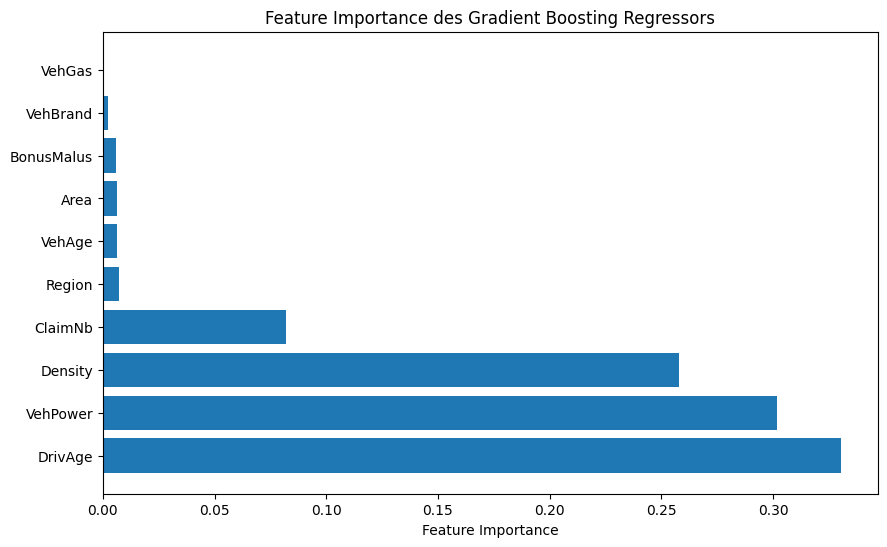

In [72]:
#Ermittlung, welche Variablen für das am besten abschneidende Modell relevant sind:
#Abruf der Wichtigkeit von Features
importance = gbr.feature_importances_
feature_names = X_train_scaled.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plotten der Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance des Gradient Boosting Regressors')
plt.show()


Erkenntnis: am wichtigsten bei der Ermittlung der Schadenshöhe pro Kunde und Jahr war beim Gradient Boosting Regressor das Feature 'DrivAge' (Fahreralter).

## Optionen der Optimierung der Modellierung:


1.   **Hyperparameter Tuning**

Hier werden verschiedene Kombinationen von Parametern der Modelle zügig mithilfe der Grid oder Random Search durchprobiert und anschließend kann das Modell mit der am besten abschneidenden Kombination trainiert werden.


2.   **Effektiveres Feature Engineering**

Hier könnte man anstelle des verwendeten Label Encoders den One Hot Encoder benutzen. Hierdurch hätte man für jede Wertausprägung eine weitere Spalte im Datensatz. Zwar würde das die Berechnungszeit erheblich erhöhen, aber eine genauere Berechnung der Schadenshöhe je Kunde und Jahr bewirken.

